In [2]:
import pandas as pd

In [56]:
df = pd.read_csv('../experiment_results/Topology_size_26.05_20:48/results.csv')
#df2 = pd.read_csv('../experiment_results/Topology_size_24.05/results.csv')
dfsi = pd.read_csv('../experiment_results/Topology_size_27.05_si_mod/results.csv')
#dfsi2 = pd.read_csv('../experiment_results/Topology_size_27.05_si_steane/results.csv')

# Corrected filtering on df2 only
#df2_filtered = df2[(df2['code'] == "steane") & (df2['error_type'] == "sd6")]

# Append the filtered rows from df2 to df
df_combined = pd.concat([df, dfsi], ignore_index=True)

In [57]:
df = df_combined

In [23]:
df

,backend,backend_size,code,decoder,distance,cycles,num_samples,error_type,error_probability,logical_error_rate,layout_method,routing_method,translating_method
0,custom_full,300,gross,bposd,150,3,1000,em3_1,0.010,0.000,NaN,NaN,NaN
1,custom_full,300,gross,bposd,150,3,1000,em3_1,0.015,0.000,NaN,NaN,NaN
2,custom_full,300,gross,bposd,150,3,1000,em3_2,0.015,0.000,NaN,NaN,NaN
3,custom_full,300,gross,bposd,150,3,1000,em3_2,0.010,0.000,NaN,NaN,NaN
4,custom_full,350,gross,bposd,175,3,1000,em3_1,0.015,0.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,custom_full,350,steane,bposd,9,1,1000,si1000,0.015,0.123,NaN,NaN,NaN
366,custom_full,500,steane,bposd,9,1,1000,si1000,0.010,0.082,NaN,NaN,NaN
367,custom_full,400,steane,bposd,9,1,1000,si1000,0.015,0.095,NaN,NaN,NaN
368,custom_full,450,steane,bposd,9,1,1000,si1000,0.015,0.118,NaN,NaN,NaN


In [58]:
import matplotlib.pyplot as plt

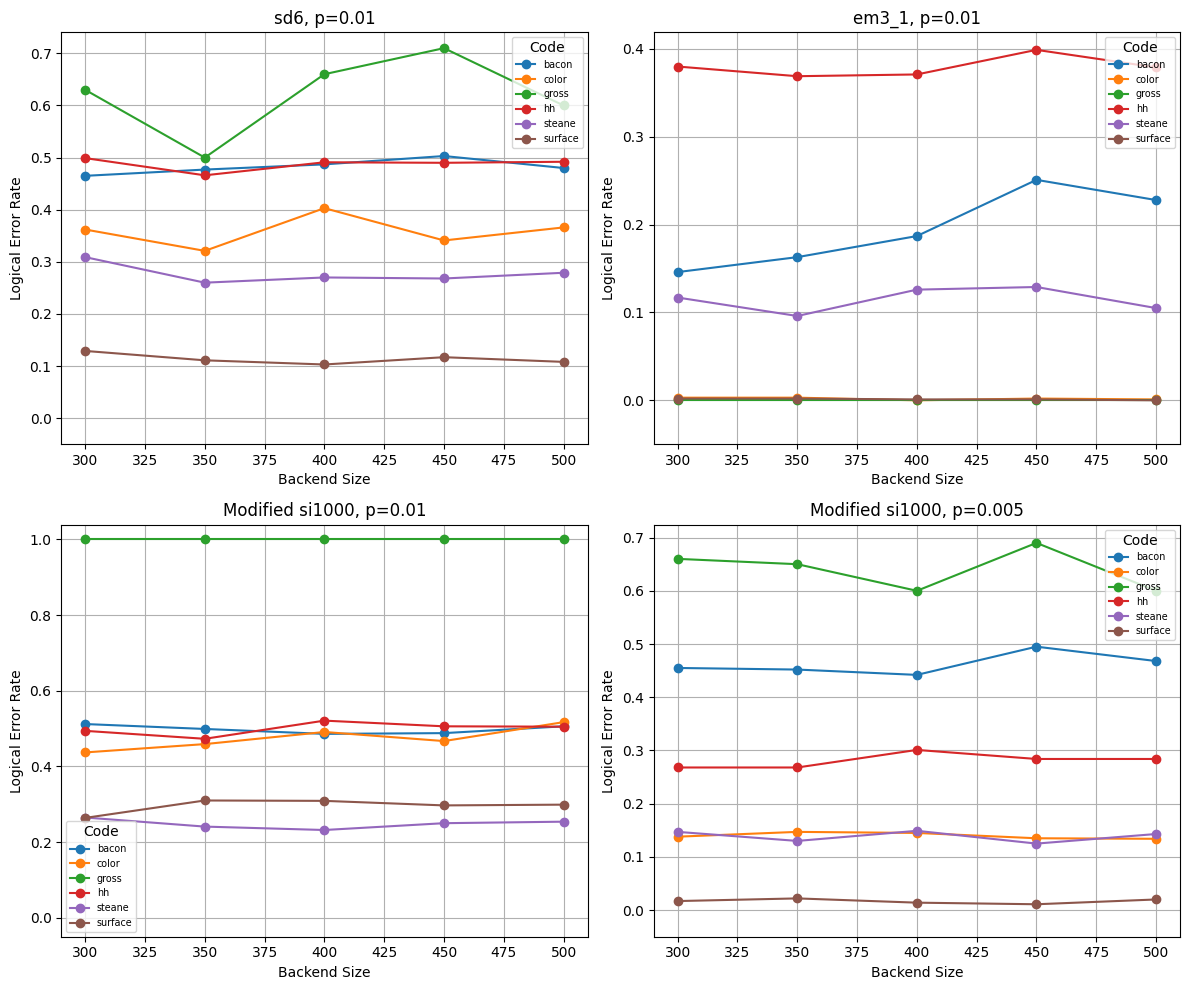

In [61]:
import matplotlib.pyplot as plt

# Define combinations of error type and error probability
plot_params = [
    ('sd6', 0.01),
    ('em3_1', 0.01),
    ('si1000', 0.01),
    ('si1000', 0.005)
]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to easily index subplots

for idx, (et, p) in enumerate(plot_params):
    ax = axes[idx]
    subset = df[(df['error_probability'] == p) & (df['error_type'] == et)]

    for code, group in subset.groupby('code'):
        group_sorted = group.sort_values('backend_size')
        ax.plot(group_sorted['backend_size'], group_sorted['logical_error_rate'],
                label=code, marker='o')
    if et == "si1000":
        et = "Modified si1000"
    ax.set_title(f'{et}, p={p}', fontsize=12)
    ax.set_xlabel('Backend Size')
    ax.set_ylabel('Logical Error Rate')
    ax.grid(True)
    ax.legend(title='Code', fontsize='x-small')
    ax.set_ylim(bottom=-0.05)

# Overall formatting
plt.tight_layout()
plt.savefig("../data/Topology_size_27.05/mod_si_four_plots.png")
plt.show()


In [15]:
df = pd.read_csv('../experiment_results/Topology_connectivity_31.05_20:45/results.csv')
print(df)
print("Total number of rows:", len(df))

         backend  backend_size   code decoder  distance  cycles  num_samples  \
0    custom_cube           729  gross   bposd       256       3         1000   
1    custom_cube           729  gross   bposd       256       3         1000   
2    custom_grid           729  gross   bposd       364       3         1000   
3    custom_cube           729  gross   bposd       256       3         1000   
4    custom_cube           729  gross   bposd       256       3         1000   
..           ...           ...    ...     ...       ...     ...          ...   
211  custom_line           729  color   bposd        17       3         1000   
212  custom_line           729  color   bposd        17       3         1000   
213  custom_grid           729  color   bposd        17       3         1000   
214  custom_grid           729  color   bposd        17       3         1000   
215  custom_grid           729  color   bposd        17       3         1000   

    error_type  error_probability  logi

In [ ]:
df

,backend,backend_size,code,decoder,distance,cycles,num_samples,error_type,error_probability,logical_error_rate,layout_method,routing_method,translating_method
0,custom_full,729,steane,bposd,27,3,1000,em3_1,0.010,0.000,NaN,NaN,NaN
1,custom_full,729,gross,bposd,364,3,1000,em3_1,0.015,0.000,NaN,NaN,NaN
2,custom_full,729,gross,bposd,364,3,1000,em3_2,0.010,0.000,NaN,NaN,NaN
3,custom_full,729,steane,bposd,27,3,1000,em3_1,0.015,0.000,NaN,NaN,NaN
4,custom_full,729,gross,bposd,364,3,1000,em3_2,0.015,0.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,custom_full,729,hh,bposd,17,3,1000,sd6,0.010,0.481,NaN,NaN,NaN
59,custom_full,729,hh,bposd,17,3,1000,sd6,0.015,0.464,NaN,NaN,NaN
60,custom_full,729,color,bposd,17,3,1000,sd6,0.010,0.391,NaN,NaN,NaN
61,custom_full,729,color,bposd,17,3,1000,sd6,0.050,0.498,NaN,NaN,NaN


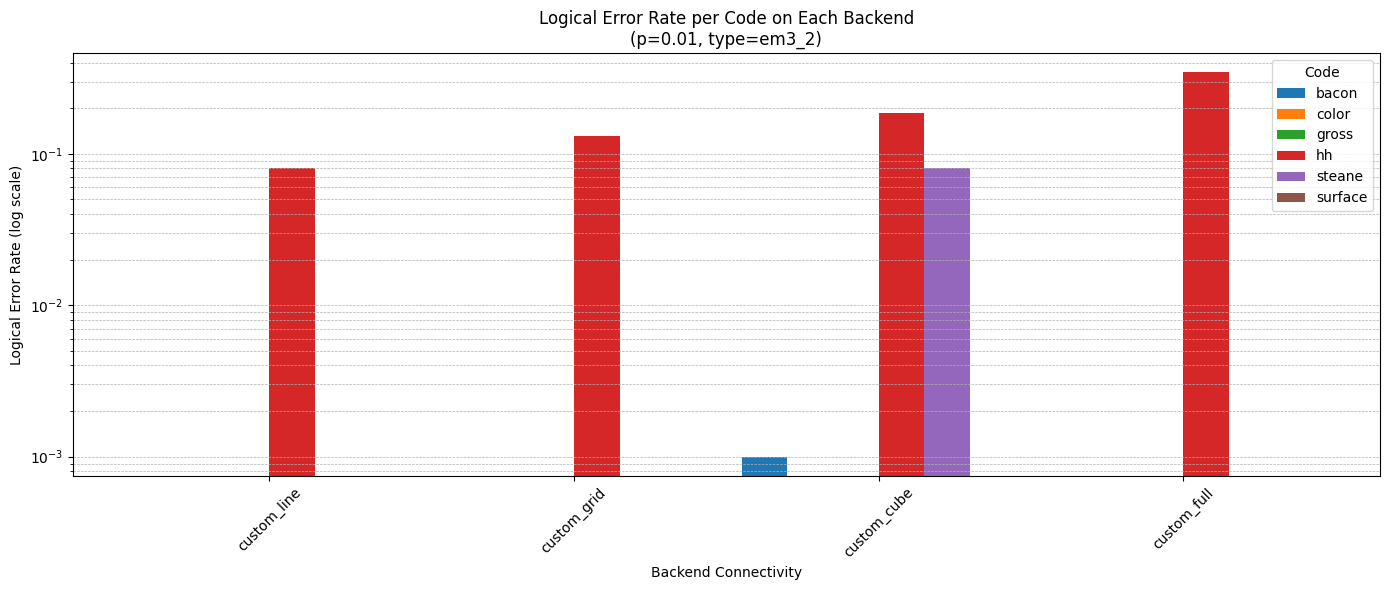

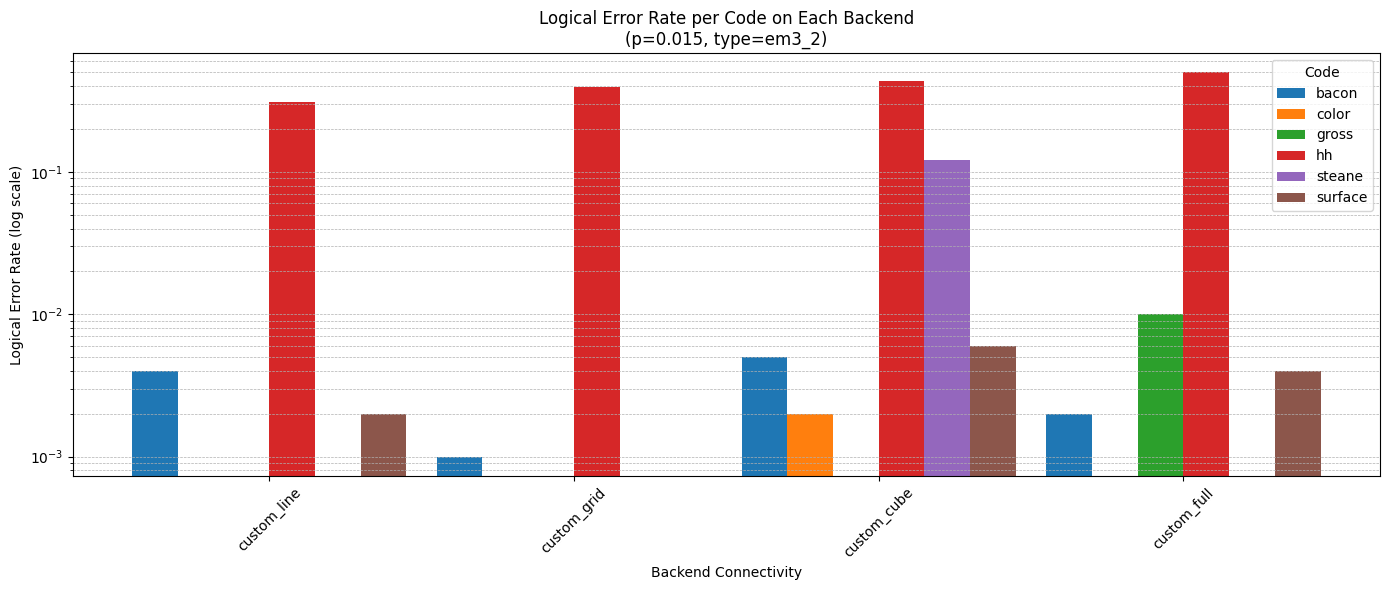

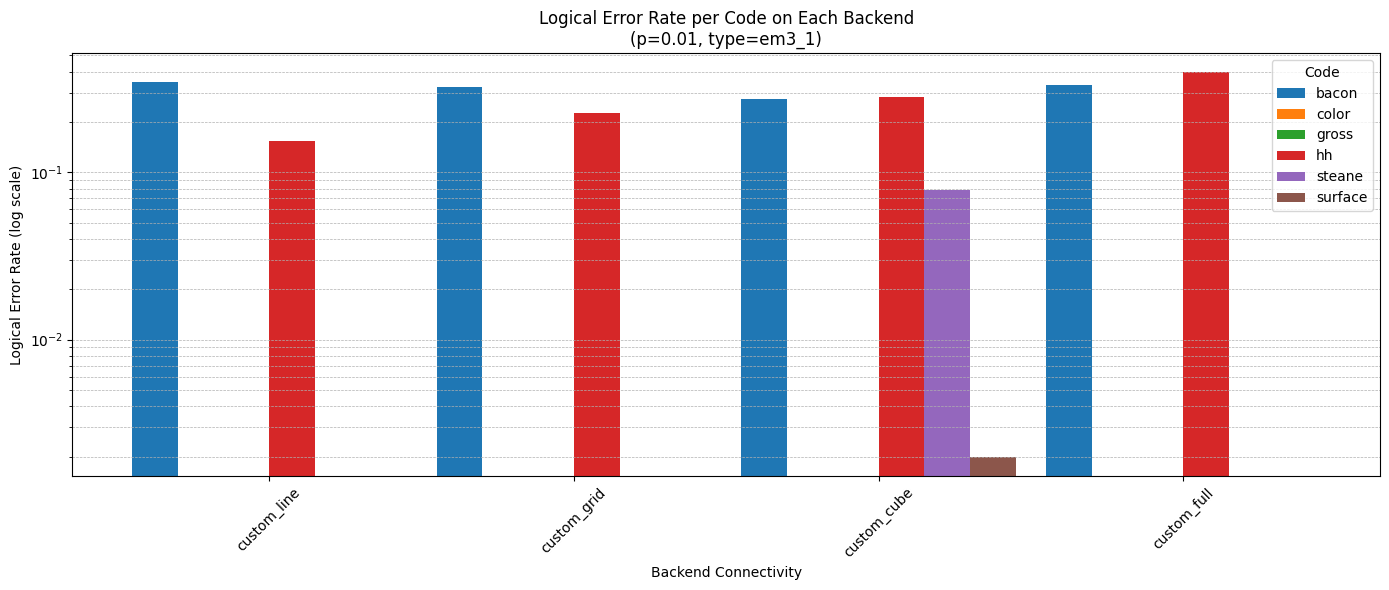

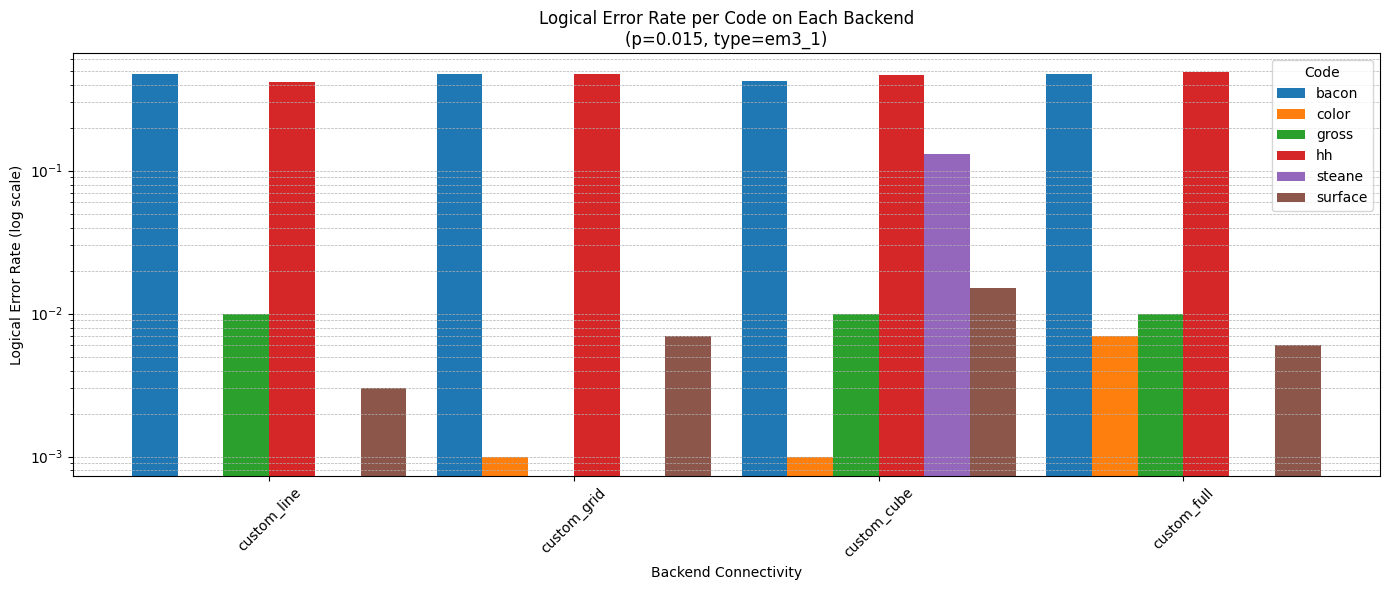

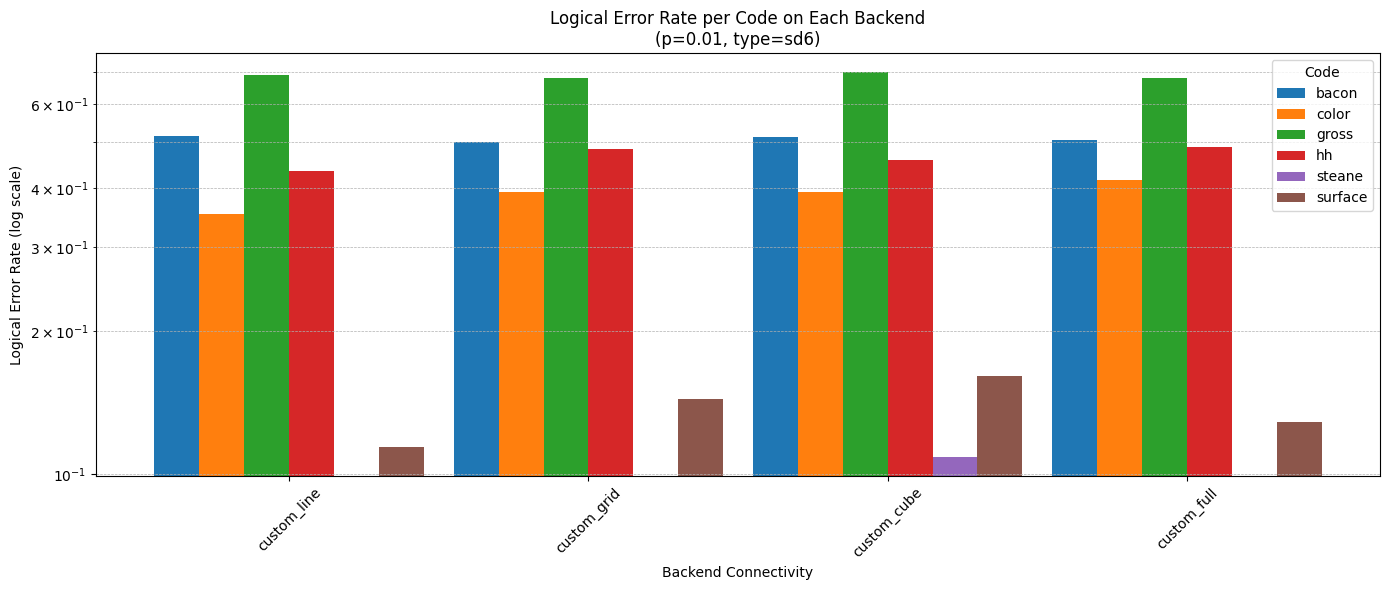

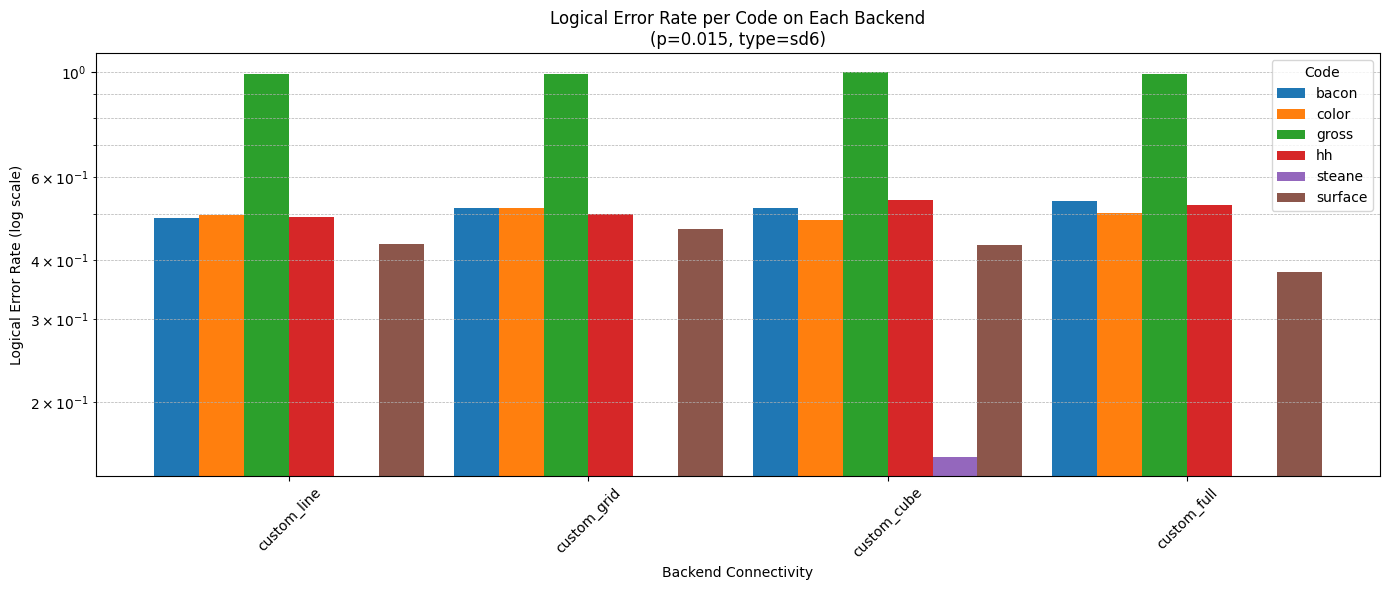

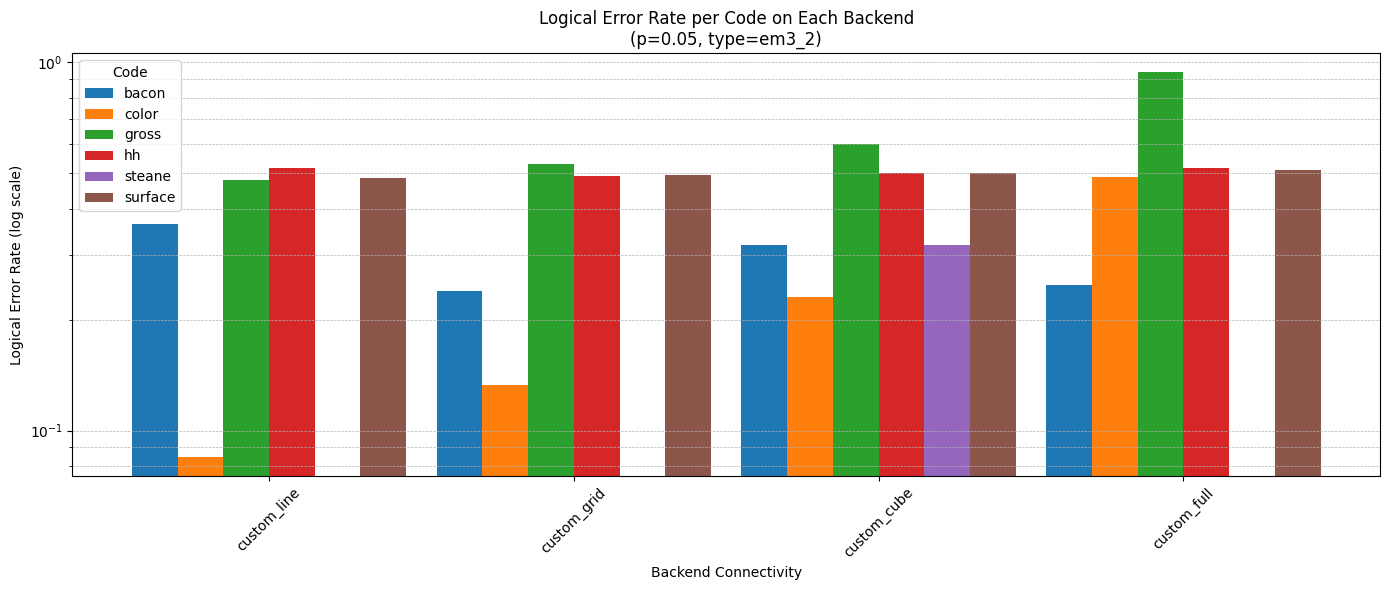

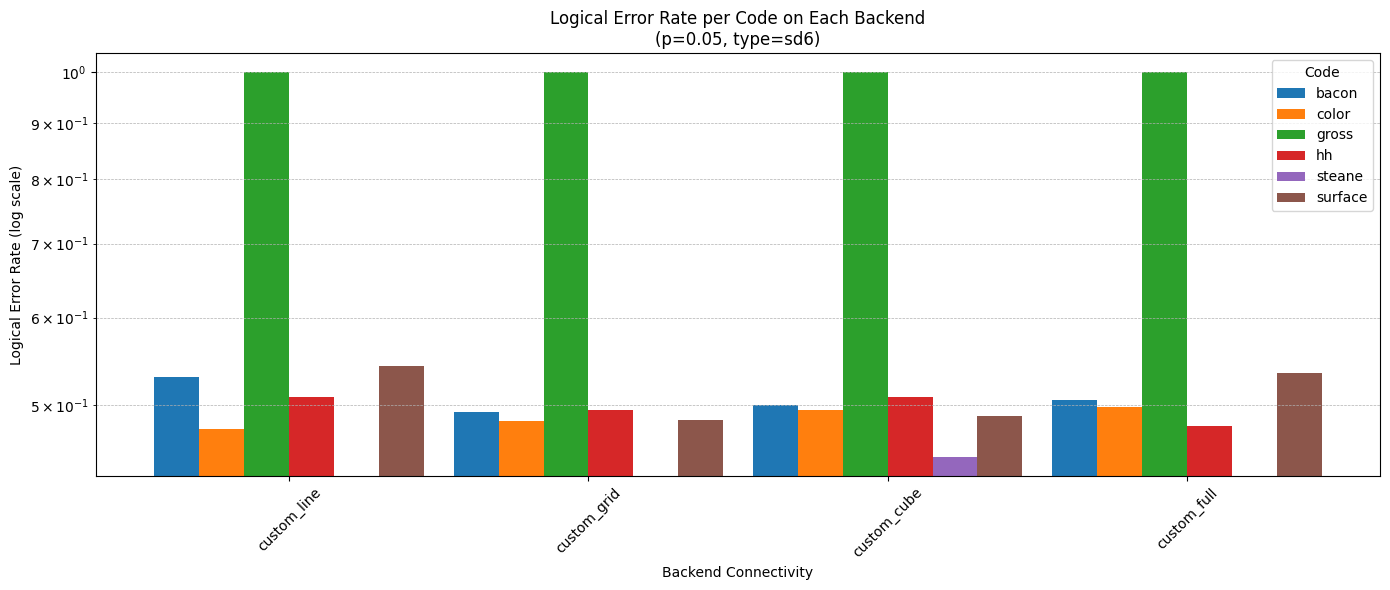

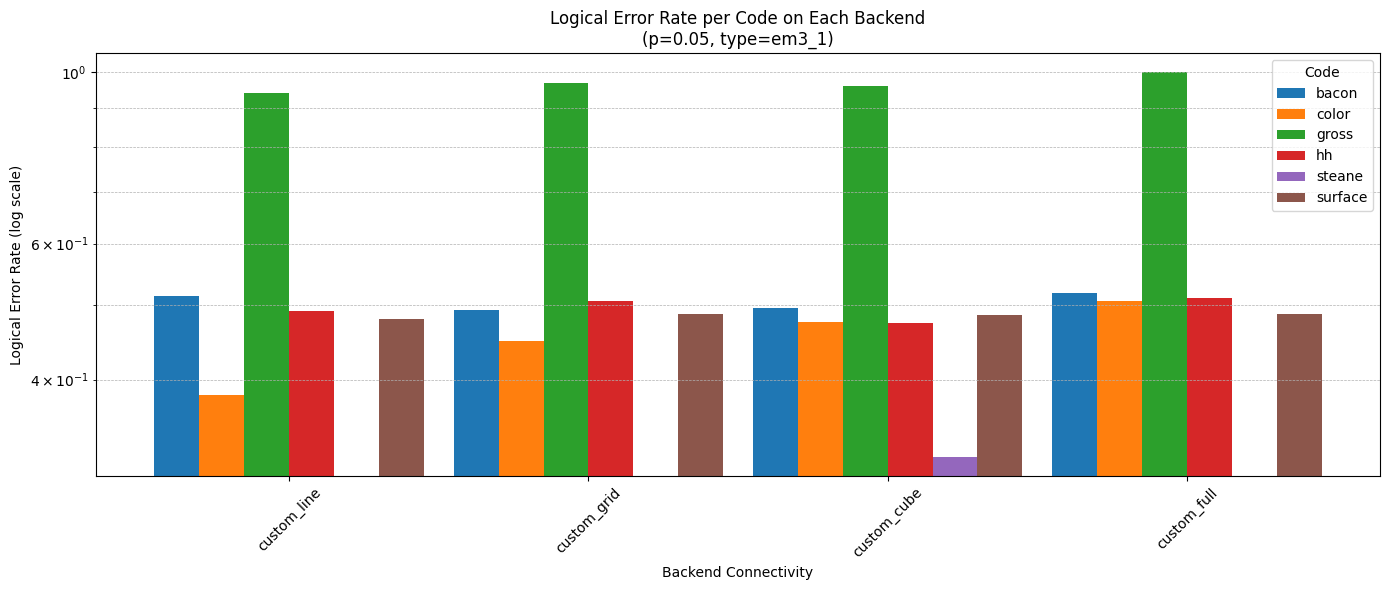

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define custom backend order
custom_order = ['custom_line', 'custom_grid', 'custom_cube', 'custom_full']

# Get all unique combinations of error_probability and error_type
combinations = df[['error_probability', 'error_type']].drop_duplicates()

# Loop through each combination
for _, row in combinations.iterrows():
    p = row['error_probability']
    et = row['error_type']

    # Filter the subset
    subset = df[(df['error_probability'] == p) & (df['error_type'] == et)]

    # Create pivot table and reindex
    pivot_df = subset.pivot_table(index='backend', columns='code', values='logical_error_rate', aggfunc='mean')
    pivot_df = pivot_df.reindex(custom_order)

    # Skip empty or invalid plots
    if pivot_df.dropna(how='all').empty:
        continue

    # Prepare plot data
    backends = pivot_df.index
    codes = pivot_df.columns
    x = np.arange(len(backends))
    width = 0.15

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(14, 6))
    for i, code in enumerate(codes):
        ax.bar(x + i * width, pivot_df[code], width, label=code)

    # Formatting
    ax.set_yscale('log')  # Logarithmic scale for error rate
    ax.set_xlabel('Backend Connectivity')
    ax.set_ylabel('Logical Error Rate (log scale)')
    ax.set_title(f'Logical Error Rate per Code on Each Backend\n(p={p}, type={et})')
    ax.set_xticks(x + width * (len(codes) - 1) / 2)
    ax.set_xticklabels(backends, rotation=45)
    ax.legend(title='Code')
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    # Optional: save to file
    # plt.savefig(f"barplot_{et}_p{str(p).replace('.', '')}.png")
    plt.show()


In [2]:
import pandas as pd
df_decoders = pd.read_csv("../experiment_results/test_decoders/results.csv")

In [5]:
df_decoders[["code", "decoder", "logical_error_rate"]].sort_values(by="code")

,code,decoder,logical_error_rate
1,bacon,mwpm,0.039
5,bacon,bposd_faster,0.040
11,bacon,bposd_gross,0.043
16,color,bposd_gross,0.249
4,color,mwpm,0.504
10,color,bposd_faster,0.296
13,gross,bposd_gross,0.269
7,gross,bposd_faster,0.304
14,hh,bposd_gross,0.447
8,hh,bposd_faster,0.462


In [3]:
best_decoders = df_decoders.loc[df_decoders.groupby("code")["logical_error_rate"].idxmin()]
best_decoders = best_decoders[["code", "decoder", "logical_error_rate"]].sort_values(by="code")
display(best_decoders)

,code,decoder,logical_error_rate
1,bacon,mwpm,0.039
16,color,bposd_gross,0.249
13,gross,bposd_gross,0.269
14,hh,bposd_gross,0.447
12,steane,bposd_gross,0.124
15,surface,bposd_gross,0.021


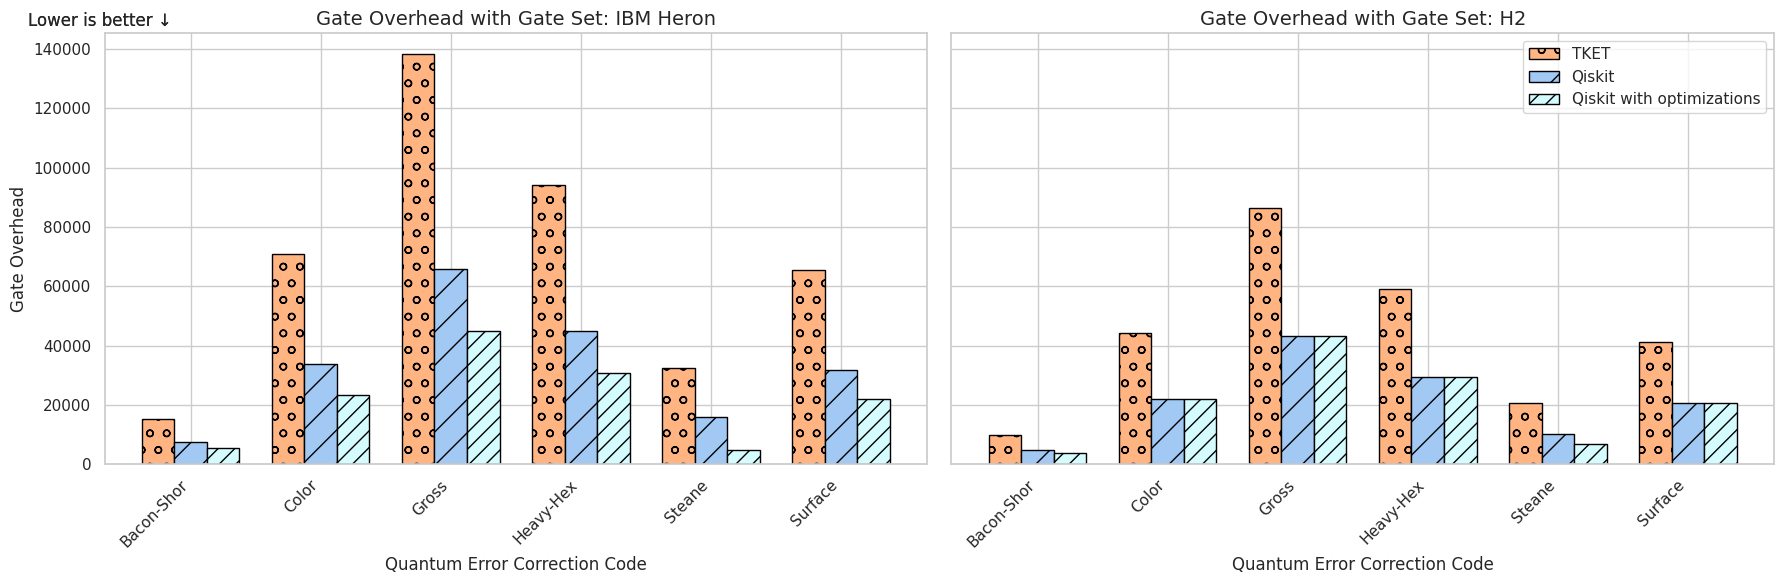

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load original data
df = pd.read_csv("../experiment_results/Translation/results.csv")

# Load optimized Qiskit results
df_optimized = pd.read_csv("../experiment_results/Translation_qiskit_optimized/results.csv")
df_optimized = df_optimized[df_optimized["translating_method"] == "qiskit"].copy()
df_optimized["translating_method"] = "Qiskit with optimizations"

# Combine DataFrames
df = pd.concat([df, df_optimized], ignore_index=True)

# Method name formatting
method_label_map = {
    "tket": "TKET",
    "qiskit": "Qiskit",
    "Qiskit with optimizations": "Qiskit with optimizations",
}
df["translating_method"] = df["translating_method"].map(method_label_map)

# Gate sets to include
gate_sets = ["ibm_heron", "h2"]
translation_methods = ["TKET", "Qiskit", "Qiskit with optimizations"]
df = df[df["gate_set"].isin(gate_sets) & df["translating_method"].isin(translation_methods)]

# Format code names
def format_code(code):
    code = code.capitalize()
    if code == "Bacon":
        return "Bacon-Shor"
    elif code == "Hh":
        return "Heavy-Hex"
    return code

df["code"] = df["code"].apply(format_code)

# Plot settings
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Set pastel palette base color
base_palette = sns.color_palette("pastel", n_colors=2)
qiskit_color = base_palette[0]  # shared base for both Qiskits
tket_color = base_palette[1]
optimized_qiskit_color = tuple(min(1, c + 0.2) for c in qiskit_color)

# Colors and hatches
color_map = {
    "TKET": tket_color,
    "Qiskit": qiskit_color,
    "Qiskit with optimizations": optimized_qiskit_color,
}
hatches = ["o", "/", "//"]  # different hatches per method

# Sort and format code labels
codes = sorted(df["code"].unique())

# Plot bars with hatching
bar_width = 0.25
x = np.arange(len(codes))

for i, gate_set in enumerate(gate_sets):
    ax = axes[i]
    subset = df[df["gate_set"] == gate_set]

    pivot = subset.pivot_table(
        index="code",
        columns="translating_method",
        values="gate_overhead",
        aggfunc="mean",
    ).reindex(codes).reindex(columns=translation_methods, fill_value=0)

    for j, method in enumerate(translation_methods):
        values = pivot[method].values
        bars = ax.bar(
            x + j * bar_width,
            values,
            width=bar_width,
            color=color_map[method],
            hatch=hatches[j % len(hatches)],
            edgecolor="black",
            label=method
        )

    ax.set_title(f"Gate Overhead with Gate Set: {'IBM Heron' if gate_set == 'ibm_heron' else 'H2'}", fontsize=14)
    ax.set_xlabel("Quantum Error Correction Code")
    axes[0].set_ylabel("Gate Overhead")
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(codes, rotation=45, ha="right")

    # Add "Lower is better ↓" in top-left corner
    ylim = ax.get_ylim()
    axes[0].text(
        -1,                      # left side
        ylim[1] * 1.05,         # near top
        "Lower is better ↓",
        fontsize=12,
        fontweight="bold",
        verticalalignment="top",
        horizontalalignment="left"
    )

# Legend and layout
axes[1].legend()
plt.tight_layout()

# Uncomment to save
plt.savefig("../data/translation/overhead_without_bqskit.png")
plt.show()


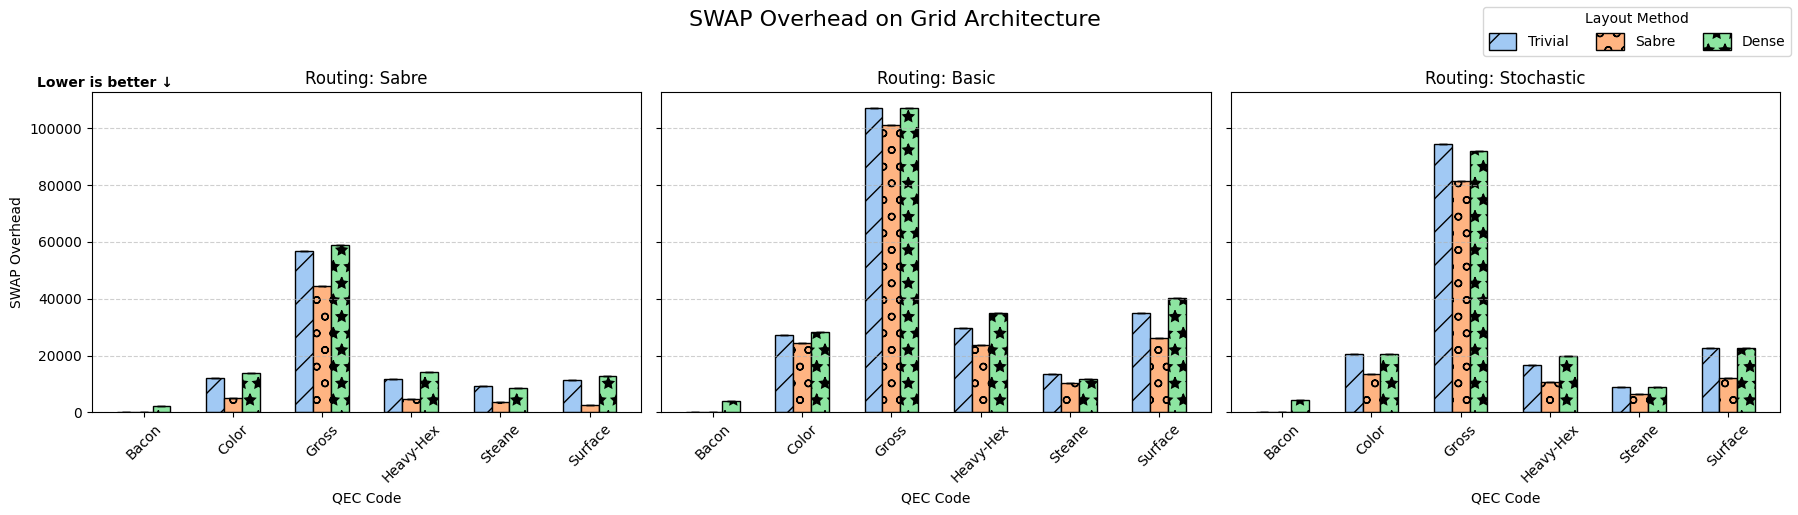

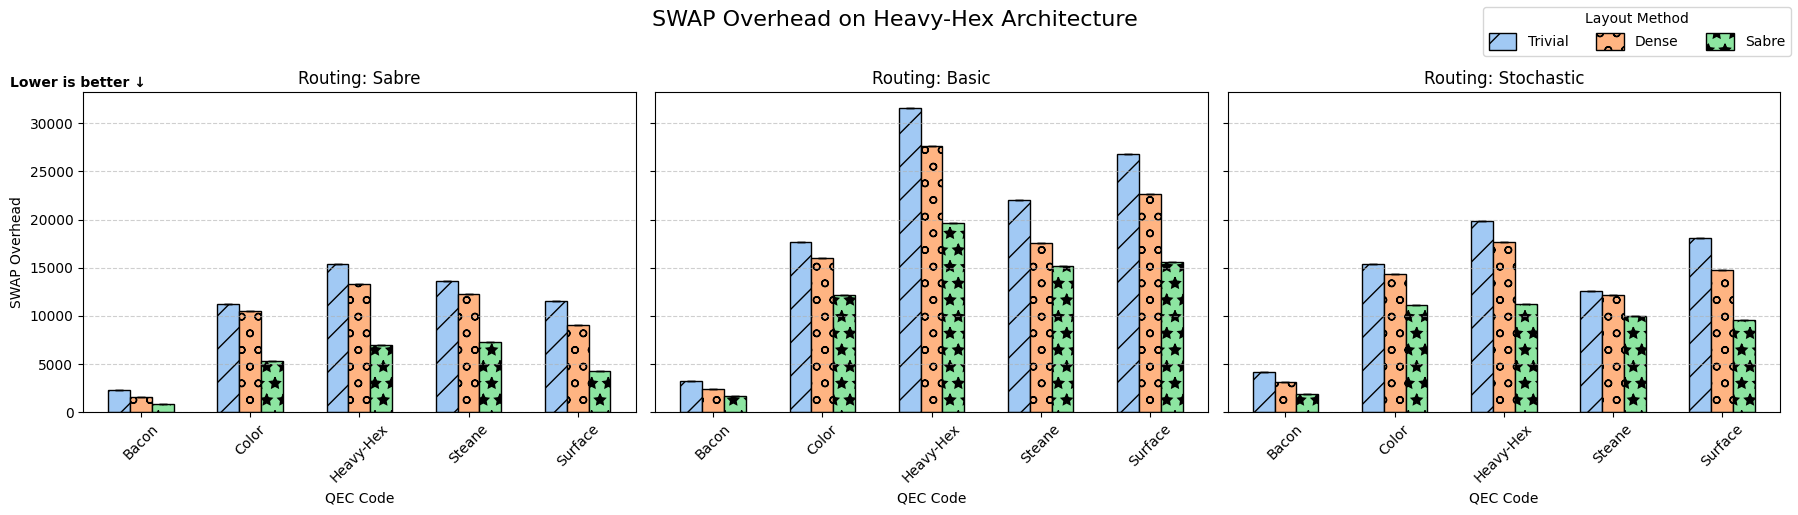

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def format_code(code):
    code = code.lower()
    return {
        "hh": "Heavy-Hex",
        "surface": "Surface",
        "color": "Color"
    }.get(code, code.capitalize())

def plot_faceted_overhead(df, backend_label, total_columns=3):
    df["code"] = df["code"].apply(format_code)
    
    routing_methods = df["routing_method"].dropna().unique()
    layout_methods = df["layout_method"].dropna().unique()
    codes = sorted(df["code"].unique())

    n_routing = len(routing_methods)
    n_cols = total_columns
    n_rows = int(np.ceil(n_routing / n_cols))

    plot_width_per_col = 6
    plot_height_per_row = 5

    bar_width = 0.2
    palette = sns.color_palette("pastel", n_colors=len(layout_methods))
    hatches = ['/', 'o', '*', '\\', '-']
    layout_styles = {
        layout: (palette[i % len(palette)], hatches[i % len(hatches)])
        for i, layout in enumerate(layout_methods)
    }

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(plot_width_per_col * n_cols, plot_height_per_row * n_rows), sharey=True)
    axes = axes.flatten()

    for i, routing in enumerate(routing_methods):
        ax = axes[i]
        subset = df[df["routing_method"] == routing]

        x = np.arange(len(codes))
        for j, layout in enumerate(layout_methods):
            values = []
            errors = []
            for code in codes:
                entry = subset[(subset["layout_method"] == layout) & (subset["code"] == code)]
                mean = entry["swap_overhead_mean"].values[0] if not entry.empty else 0
                var = entry["swap_overhead_var"].values[0] if not entry.empty else 0
                values.append(mean)
                errors.append(np.sqrt(var))

            ax.bar(
                x + j * bar_width,
                values,
                width=bar_width,
                label=layout.capitalize(),
                color=layout_styles[layout][0],
                edgecolor="black",
                hatch=layout_styles[layout][1],
                yerr=errors,
                capsize=3,
            )

        ax.set_title(f"Routing: {routing.capitalize()}")
        ax.set_xticks(x + (bar_width * (len(layout_methods) - 1)) / 2)
        ax.set_xticklabels(codes, rotation=45)
        ax.set_xlabel("QEC Code")
        if i % n_cols == 0:
            ax.set_ylabel("SWAP Overhead")

        # ✅ Add horizontal grid lines
        ax.grid(True, axis='y', linestyle='--', alpha=0.6)

    ylim = axes[0].get_ylim()
    axes[0].text(
        -1,
        ylim[1] * 1.05,
        "Lower is better ↓",
        fontsize=10,
        fontweight="bold",
        verticalalignment="top",
        horizontalalignment="left"
    )

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    handles = [
        plt.Rectangle((0, 0), 1, 1,
                      facecolor=layout_styles[layout][0],
                      edgecolor='black',
                      hatch=layout_styles[layout][1])
        for layout in layout_methods
    ]
    labels = [layout.capitalize() for layout in layout_methods]
    fig.legend(handles, labels, title="Layout Method", loc="upper right", ncol=len(layout_methods),    handleheight=1.5 )

    fig.suptitle(f"SWAP Overhead on {backend_label} Architecture", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig(f"../data/routing/routing_{backend_label}.png",bbox_inches='tight')
    plt.show()

# Load and plot
df_grid = pd.read_csv("../experiment_results/Routing_grid_29.06/results.csv")
df_hh = pd.read_csv("../experiment_results/Routing_hh_29.06/results.csv")

plot_faceted_overhead(df_grid, "Grid")
plot_faceted_overhead(df_hh, "Heavy-Hex")
